# Lab session 1 ---- Linear Regression

Student:                       
Date:

## I. Introduction
In this exercise, we will implement linear regression with one and multiple variables, as well as gradient descent.

## II. Linear regression with one variable
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new food truck. The chain already has trucks in various cities and you have data for profits and populations from the cities.
You would like to use this data to help you select which city to expand to next. The file lab1data1.txt contains the dataset: the first column is the poplulation of a city and the second column is the profit of a food truck in that city. An negative value for profit indicates a loss.

### Solution Question 1

[[  6.1101]
 [  5.5277]
 [  8.5186]
 [  7.0032]
 [  5.8598]
 [  8.3829]
 [  7.4764]
 [  8.5781]
 [  6.4862]
 [  5.0546]
 [  5.7107]
 [ 14.164 ]
 [  5.734 ]
 [  8.4084]
 [  5.6407]
 [  5.3794]
 [  6.3654]
 [  5.1301]
 [  6.4296]
 [  7.0708]
 [  6.1891]
 [ 20.27  ]
 [  5.4901]
 [  6.3261]
 [  5.5649]
 [ 18.945 ]
 [ 12.828 ]
 [ 10.957 ]
 [ 13.176 ]
 [ 22.203 ]
 [  5.2524]
 [  6.5894]
 [  9.2482]
 [  5.8918]
 [  8.2111]
 [  7.9334]
 [  8.0959]
 [  5.6063]
 [ 12.836 ]
 [  6.3534]
 [  5.4069]
 [  6.8825]
 [ 11.708 ]
 [  5.7737]
 [  7.8247]
 [  7.0931]
 [  5.0702]
 [  5.8014]
 [ 11.7   ]
 [  5.5416]
 [  7.5402]
 [  5.3077]
 [  7.4239]
 [  7.6031]
 [  6.3328]
 [  6.3589]
 [  6.2742]
 [  5.6397]
 [  9.3102]
 [  9.4536]
 [  8.8254]
 [  5.1793]
 [ 21.279 ]
 [ 14.908 ]
 [ 18.959 ]
 [  7.2182]
 [  8.2951]
 [ 10.236 ]
 [  5.4994]
 [ 20.341 ]
 [ 10.136 ]
 [  7.3345]
 [  6.0062]
 [  7.2259]
 [  5.0269]
 [  6.5479]
 [  7.5386]
 [  5.0365]
 [ 10.274 ]
 [  5.1077]
 [  5.7292]
 [  5.1884]
 [  6.3557]
 [  

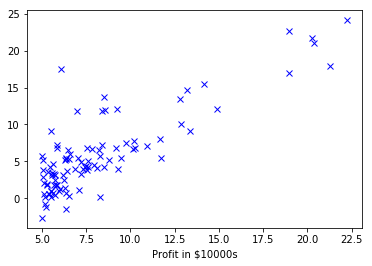

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
    
# loading
data = np.loadtxt('lab1data1.txt', delimiter=',' )

#separating
x=np.atleast_2d(data[:,:-1])
y=data[:,-1]
print(x)

#ploating
plt.plot(x,y,'bx', label='training')
plt.xlabel('Population of city in 10000s')
plt.xlabel('Profit in $10000s')
plt.show()


### Solution Question 2

[ 0.71726101 -0.01357131]
[-3.89578088  1.19303364]


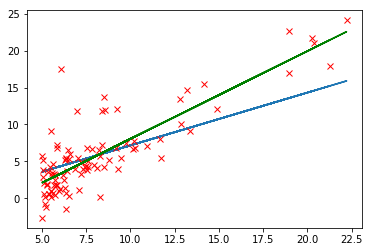

In [31]:
# Linear Regression
def linear_regression(x,y):
    
    length = len(x);
    A = sum(x*y)-sum(x)*sum(y)
    B = sum(x**2)-(sum(x))**2
    
    w1 = (length*A)/(length*B)
    w0 = np.mean(y)-w1*np.mean(x)
    
    w = [w1,w0]
    
    return w
#Plot
wt = linear_regression(x,y)

w1, w0 = wt
yr = w0 + w1 * x

plt.plot(x,np.mean(yr, axis=1))
plt.plot(x,y,'rx')

intercept = np.ones((x.shape[0],1))
Xstack = np.asmatrix(np.hstack((intercept,x)))
wt2,_,_,_=np.linalg.lstsq(Xstack,y)
print(np.mean(wt, axis=1))
print(wt2)

yrtrue = wt2[1] * x + wt2[0]
plt.plot(x,yrtrue, 'g')    
plt.show()

### Solution Question 3

In [32]:
# Making Predictions

test = np.array ([3.5,7.0])
w = [1.19303364,-3.89578088]
def predict (wt2,y):
    y = np.vstack([y.flatten(),np.ones(len(y.flatten()))])
    predict = np.dot(wt2,y)
    return predict

prediction = predict(w,test)
print('The parameters estimated are : {}'.format(prediction*10000))

The parameters estimated are : [  2798.3686  44554.546 ]


## III. Linear regression with multiple variables
Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to collect information on recent houses sold and make a model of housing prices.
The file lab1data2.txt contains a training set of housing prices in a city. The first column is the size of the house (in square feet), the second column is the number of bedrooms and the third column is the price of the house.

### Solution Question 1

In [33]:
#Loading Data
data1 = np.loadtxt('lab1data2.txt', delimiter=',')
#print(data1)

def linear_RedMultiple(data):
    x = data[:,0:2]
    y = data[:,2]
    x = np.vstack((np.ones((1,x.shape[0])),x.T)).T
    w,_,_,_ = np.linalg.lstsq(x,y,rcond=0)
    return w

w = linear_RedMultiple(data1)
print('The parameters estimated are: {}'.format(w))


The parameters estimated are: [ 89597.9095428     139.21067402  -8738.01911233]


### Solution Question 2

In [34]:
def featureNormalize(x,mu = None, std_dev = None):
    norm = np.zeros_like(x)
    if (not mu):
        mu = np.mean(x)
        std_dev = np.std(x)
    norm = (x - mu)/ std_dev
    return norm
    

### Solution Question 3

In [35]:

# Normalizaing the data of data1
data2 = np.zeros_like(data1)
data2[:,0] = featureNormalize(data1[:,0])
data2[:,1] = featureNormalize(data1[:,1])
data2[:,2] = featureNormalize(data1[:,2])
#print(data2)

#Linear Regression on two variables
w = linear_RedMultiple(data2)
print('The parameters estimated are: {}'.format(w))


The parameters estimated are: [ -8.88030989e-17   8.84765988e-01  -5.31788197e-02]


### Solution Question 4

In [36]:
#Making Predictions
x_test = np.array ([16.50, 0.7])
w =  [ -8.88030989e-17, 8.84765988e-01, -5.31788197e-02]

def predict (w,y):
    y = np.vstack([y.flatten(), np.ones(len(y.flatten()))])
    predict = np.dot(wt2,y)
    return predict

prediction = predict (w,x_test)
print(prediction)


[-63.08735085  -1.53401297]


## IV. Gradient descent
We will now perform linear regression using gradient descent.

### Solution Question 1

### Solution Question 2

### Solution Question 3